# 4.9 Intro to Data Visualization Part 2

# Step 1 Prepare Environment

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path

path = r"C:\Users\leobs\OneDrive\Data Program\Achievement 4_Instacart\Instacart Basket Analysis"

In [3]:
# Import updated data set (orders, products, and customer data merged)

orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Check import

orders_products_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,sex,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
# Check shape

orders_products_all.shape

(32404859, 32)

In [6]:
# Check stats

orders_products_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int64  
 1   user_id                object 
 2   order_number           int64  
 3   order_day_of_week      int64  
 4   order_hour_of_day      int64  
 5   days_since_last_order  float64
 6   product_id             int64  
 7   add_to_cart_order      int64  
 8   reordered              int64  
 9   product_name           object 
 10  aisle_id               int64  
 11  department_id          int64  
 12  prices                 float64
 13  price_label            object 
 14  busiest_day            object 
 15  busiest_days           object 
 16  busiest_period_of_day  object 
 17  max_order              int64  
 18  loyalty_flag           object 
 19  avg_spent              float64
 20  spending_flag          object 
 21  median_last_order      float64
 22  frequency_flag  

# Step 2 Create visualizations from exercise steps

## Create a sample subset of data

In [7]:
# Set seed

np.random.seed(4)
dev = np.random.rand(len(orders_products_all)) <=0.7

In [8]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [9]:
# Store 70% of data set in dataframe big

big = orders_products_all[dev]

In [10]:
# Store 30% of data set in dataframe small

small = orders_products_all[~dev]

In [11]:
# Retrieve total rows of full data set to compare outputs

len(orders_products_all)

32404859

In [12]:
# check 70 and 30 spread to equal full original dataframe

len(big) + len(small)

32404859

## Create new dataframe from subset

Note: already completed the outlier removal during the exercise practice, where made prices > $100 nan values

In [13]:
# Check for successful outlier removal from original df

orders_products_all.loc[orders_products_all['prices'] >100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,sex,state,age,date_joined,number_of_dependants,marital_status,income


In [14]:
# Create dataframe from sample relevant to bar chart with focus on order_day_of_week and prices for visualizations

df_orders_prices_vis =small[['order_day_of_week', 'prices']]

In [15]:
df_orders_prices_vis.head()

,order_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5


In [16]:
df_orders_prices_vis.shape

(9721098, 2)

## Create bar chart of 'order_day_of_week'

<Axes: >

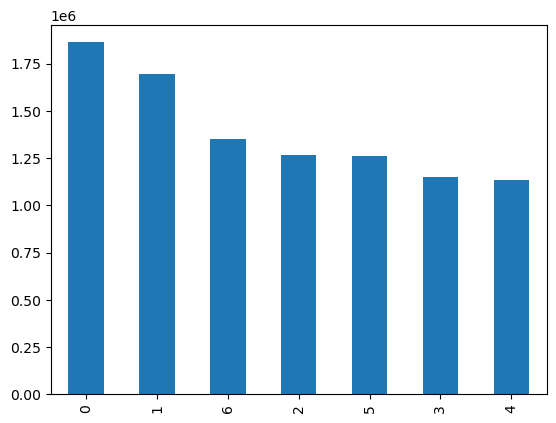

In [17]:
# Create bar chart

df_orders_prices_vis['order_day_of_week'].value_counts().plot.bar()

In [18]:
# Value counts to match

df_orders_prices_vis['order_day_of_week'].value_counts()

0    1861978
1    1696958
6    1349010
2    1264124
5    1261706
3    1152498
4    1134824
Name: order_day_of_week, dtype: int64

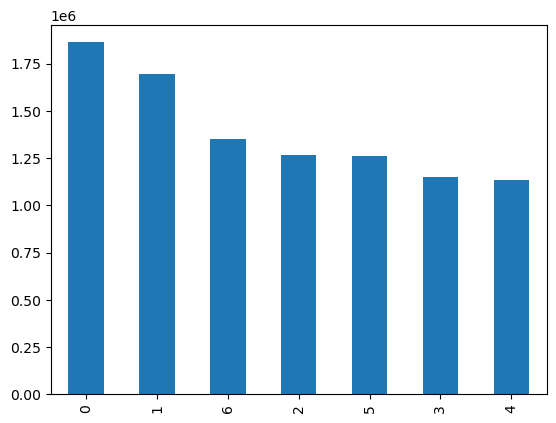

In [19]:
# Name object

bar = df_orders_prices_vis['order_day_of_week'].value_counts().plot.bar()

In [20]:
# Export bar 1

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow_value_order_final.png'))

Text(33.722222222222214, 0.5, 'Count of Orders')

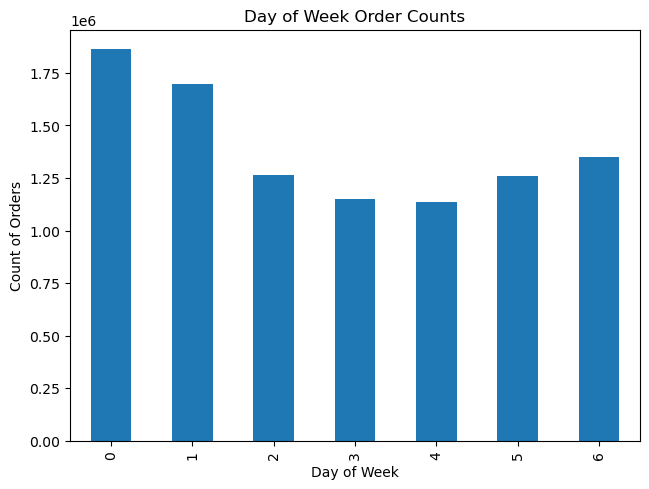

In [24]:
# Create bar_2 in order of days_of_week due to meaning of values to see flow of week

bar_2 = df_orders_prices_vis['order_day_of_week'].value_counts().sort_index().plot.bar()
        
plt.title('Day of Week Order Counts')
plt.tight_layout()
plt.xlabel('Day of Week')
plt.ylabel('Count of Orders')

In [25]:
# Export bar 2

bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow_order_count_final.png'), bbox_inches='tight')

## Create scatterplot of 'prices'

In [26]:
# Check data for prices in subset

df_orders_prices_vis['prices'].describe()

count    9.719550e+06
mean     7.789179e+00
std      4.240952e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

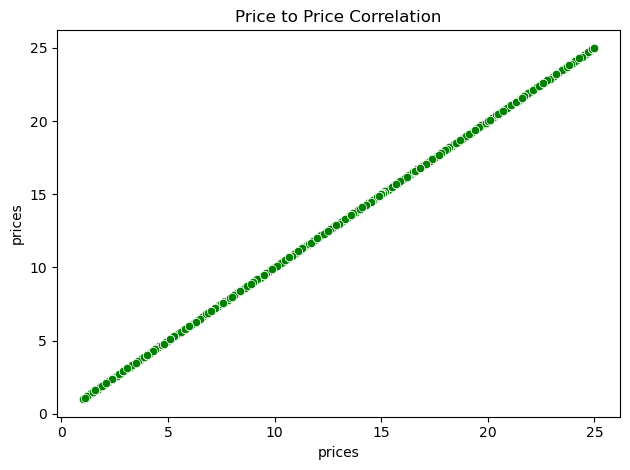

In [28]:
# Update color to set 'prices' to green (and order_day_of_week to blue)

scat_prices = sns.scatterplot(x= 'prices', y = 'prices',data = df_orders_prices_vis, color = 'green')

plt.title('Price to Price Correlation')
plt.tight_layout()

In [29]:
# Export scatterplot

scat_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_prices.png'), bbox_inches='tight')

## Create histogram of 'prices'

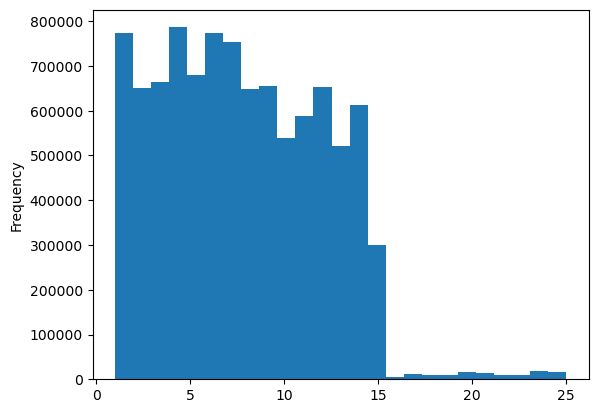

In [30]:
# Create histogram

hist_prices = df_orders_prices_vis['prices'].plot.hist(bins = 25)

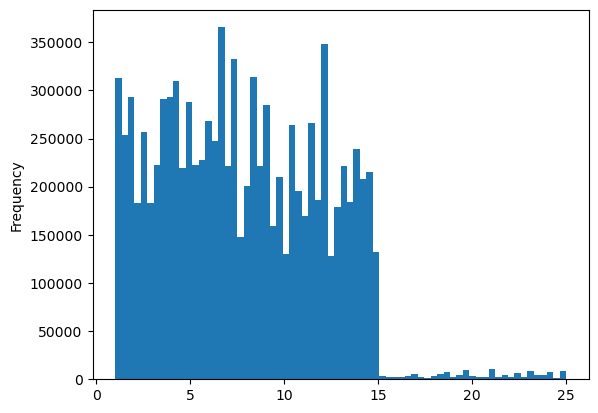

In [31]:
# Change data grain

hist_prices_2 = df_orders_prices_vis['prices'].plot.hist(bins = 70)

Text(11.472222222222216, 0.5, 'Count of Orders')

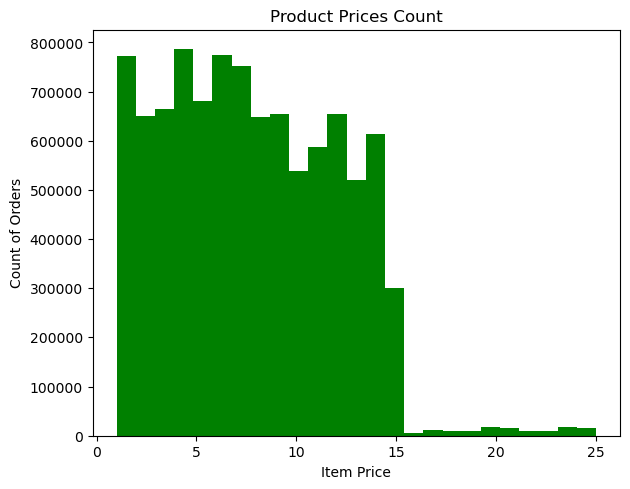

In [32]:
# Update color to focus on prices (vs. order_day_of_week)

hist_prices = df_orders_prices_vis['prices'].plot.hist(bins = 25, color = 'green')
    
plt.title('Product Prices Count')
plt.tight_layout()
plt.xlabel('Item Price')
plt.ylabel('Count of Orders')

Text(11.472222222222216, 0.5, 'Sum of Prices')

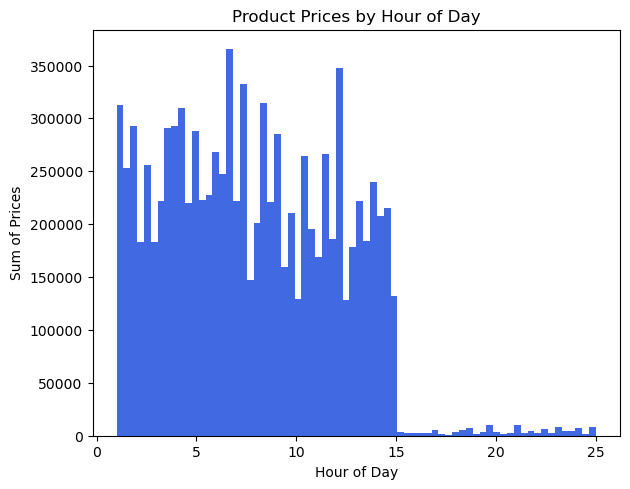

In [41]:
# Update color to focus on prices (vs. order_day_of_week)

hist_prices_2 = df_orders_prices_vis['prices'].plot.hist(bins = 70, color = 'royalblue')

plt.title('Product Prices and Order Count')
plt.tight_layout()
plt.xlabel('Product Price')
plt.ylabel('Count of Orders')

In [43]:
# Export hist

hist_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices__count.png'), bbox_inches='tight')

In [47]:
# Export hist_2

hist_prices_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_count_2.png'), bbox_inches='tight')

## Create line chart with small dataframe

As noted, this step uses a lot of ram and should only be done with a powerful computer or a subset of data. Already split data into 70/30 and therefore using the small dataframe to plot

Text(33.722222222222214, 0.5, 'Average Product Price')

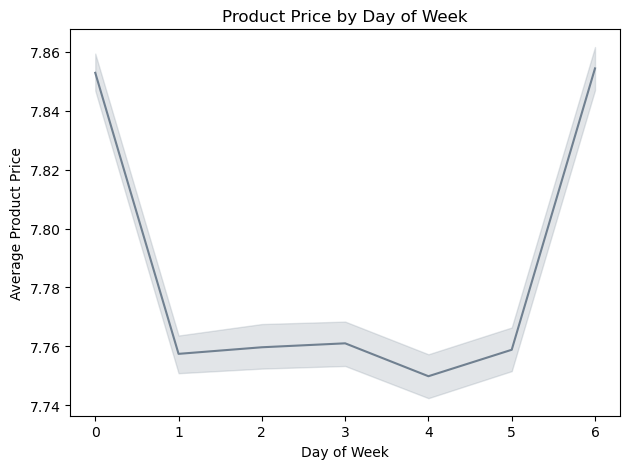

In [46]:
# Create line plot of order_day_of_week and prices

line_dow_prices = sns.lineplot(data = df_orders_prices_vis, x = 'order_day_of_week', y = 'prices', color = 'slategrey')

plt.title('Product Price by Day of Week')
plt.tight_layout()
plt.xlabel('Day of Week')
plt.ylabel('Average Product Price')

In [48]:
# Export line plot

line_dow_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_day_of_week_prices.png'), bbox_inches='tight')

# Step 3 Provide descriptive findings about sales

In [49]:
# Create subset dataframe for order_hour_of_day and prices columns

df_order_hour_of_day_vis =small[['order_hour_of_day', 'prices']]

In [50]:
# Check subset

df_order_hour_of_day_vis.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


In [51]:
df_order_hour_of_day_vis['order_hour_of_day'].value_counts().sort_index()

0      65629
1      34773
2      20736
3      15255
4      15968
5      26361
6      87456
7     266836
8     513977
9     736231
10    829016
11    819830
12    785868
13    798982
14    806654
15    799957
16    761607
17    626387
18    490574
19    377417
20    292048
21    238867
22    189839
23    120830
Name: order_hour_of_day, dtype: int64

Text(11.472222222222216, 0.5, 'Count of Orders')

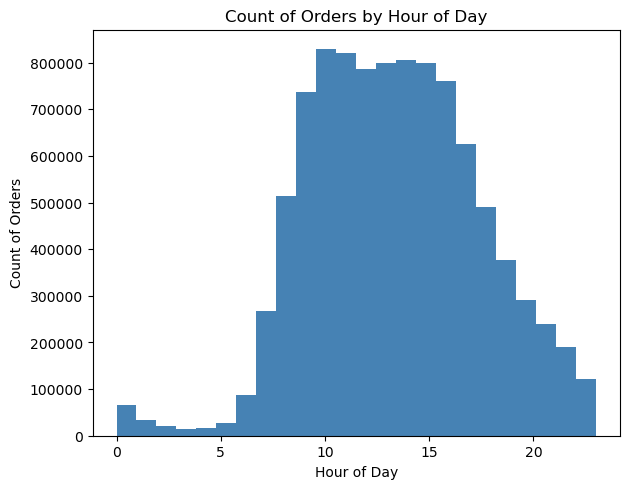

In [52]:
# Create histogram of order_hour_of_day

hist_order_hour_of_day = df_order_hour_of_day_vis['order_hour_of_day'].plot.hist(bins = 24, color = 'steelblue')

plt.title('Count of Orders by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.ylabel('Count of Orders')

# Using 24 bins due to 24 hour day

Observations: The peak order times are between 9am and 4pm (16). The slowest order times are between 1 and 5am. Orders rise between 5am and 9am, peak from 9 to 10 am and then platteau until 3pm (15), then progress downwards at approximately equal intervals until midnight (24). 

In [53]:
# Export histogram

hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'), bbox_inches='tight')

# Step 4 Find order distribution of loyal customers

In [54]:
# Create relevant dataframe including loyalty_flag'

df_loyalty_flag_vis =small[['order_id', 'loyalty_flag']]

In [55]:
# Check header

df_loyalty_flag_vis.head()

,order_id,loyalty_flag
0,2539329,New customer
2,473747,New customer
3,2254736,New customer
6,550135,New customer
10,2539329,New customer


In [56]:
# Find value counts to match bar

df_loyalty_flag_vis['loyalty_flag'].value_counts()

Regular customer    4762632
Loyal customer      3083573
New customer        1874893
Name: loyalty_flag, dtype: int64

Text(55.847222222222214, 0.5, 'Count of Customers')

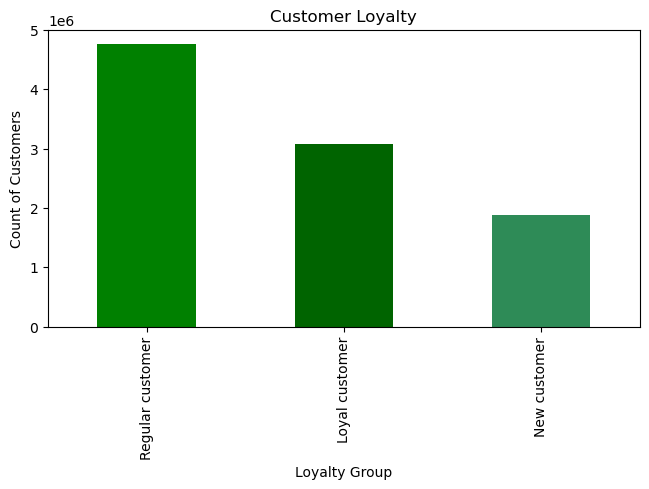

In [60]:
# Create bar chart to show distribution

bar_loyalty_flag = df_loyalty_flag_vis['loyalty_flag'].value_counts().plot.bar(color =['green', 'darkgreen', 'seagreen'])

plt.title('Customer Loyalty')
plt.tight_layout()
plt.xlabel('Loyalty Group')
plt.ylabel('Count of Customers')

Observations: Regular customers make the most orders. However, loyal customers who have the longest time since first order make less orders than regular customers and more orders than new customers. Regular customers make over twice as many orders as new customers.

In [61]:
# Export bar chart

bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'), bbox_inches='tight')

# Step 5 Expenditure and hour of day

In [62]:
# Create relevant dataframe including loyalty_flag'

df_price_hour_of_day_vis =small[['prices', 'order_hour_of_day']]

In [63]:
# Check df

df_price_hour_of_day_vis.head(24)

,prices,order_hour_of_day
0,9.0,8
2,9.0,12
3,9.0,7
6,9.0,9
10,12.5,8
12,4.4,7
13,4.4,12
19,4.4,16
21,4.7,8
22,4.7,7


Text(24.847222222222214, 0.5, 'Average Item Price')

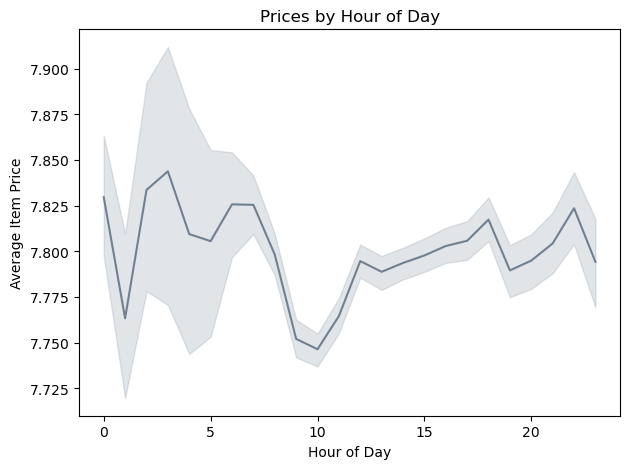

In [64]:
# Create line plot to show expenditure across hour of day

line_hour_of_day_prices = sns.lineplot(data = df_price_hour_of_day_vis, x = 'order_hour_of_day', y = 'prices', color = 'slategrey')

plt.title('Prices by Hour of Day')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.ylabel('Average Item Price')

Observations: The highest expenditure is between 2 and 4am. The lowest expenditure is between 9 and 12, which is interesting because that is the peak time for highest count of orders. This implies that there could be an inverse relationship between expenditure and total orders across hour of day.

In [65]:
# Export line chart

line_hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day_prices.png'), bbox_inches='tight')

# Step 6 EDA on customer demographics

In [66]:
# Create relevant dataframe

df_customer_demo_vis = small[['age', 'marital_status', 'number_of_dependants', 'income' ]]

In [67]:
# Check df

df_customer_demo_vis.head()

,age,marital_status,number_of_dependants,income
0,31,married,3,40423
2,31,married,3,40423
3,31,married,3,40423
6,31,married,3,40423
10,31,married,3,40423


## Determine connection or not between age and family status

In [68]:
# Explore new df

df_customer_demo_vis.describe()

,age,number_of_dependants,income
count,9.721098e+06,9.721098e+06,9.721098e+06
mean,4.946128e+01,1.502105e+00,9.942981e+04
std,1.848547e+01,1.118703e+00,4.303434e+04
min,1.800000e+01,0.000000e+00,2.590300e+04
25%,3.300000e+01,1.000000e+00,6.700900e+04
50%,4.900000e+01,2.000000e+00,9.661800e+04
75%,6.500000e+01,3.000000e+00,1.278940e+05
max,8.100000e+01,3.000000e+00,5.939010e+05


In [69]:
# Explore age

df_customer_demo_vis['age'].value_counts()

48    159461
49    159193
79    158952
64    158419
31    157751
       ...  
36    145404
60    145243
66    142936
41    142383
25    141533
Name: age, Length: 64, dtype: int64

In [70]:
# Explore number of dependants
df_customer_demo_vis['number_of_dependants'].value_counts()

3    2440208
2    2428233
0    2427640
1    2425017
Name: number_of_dependants, dtype: int64

In [71]:
# Explore income

df_customer_demo_vis['income'].value_counts()

72344     1298
112610    1291
57501     1268
115620    1188
36163     1110
          ... 
60198        1
91875        1
56433        1
102423       1
41766        1
Name: income, Length: 107845, dtype: int64

Text(33.722222222222214, 0.5, 'Number of Dependants')

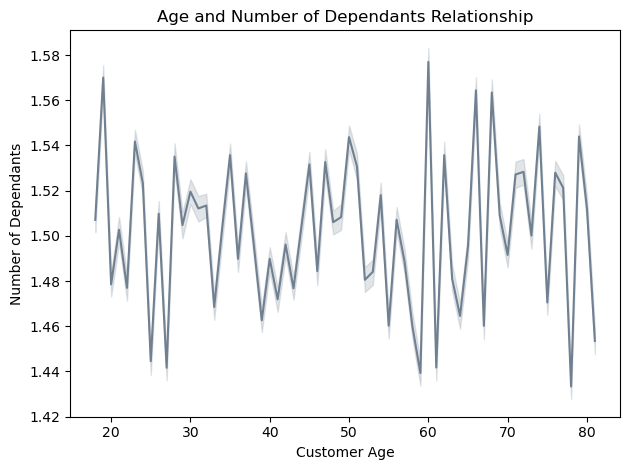

In [72]:
# Create line plot between age and number of dependants

line_age_dependants = sns.lineplot(data = df_customer_demo_vis, x = 'age', y = 'number_of_dependants', color = 'slategrey')

plt.title('Age and Number of Dependants Relationship')
plt.tight_layout()
plt.xlabel('Customer Age')
plt.ylabel('Number of Dependants')

Observations: The chart shows that there is not a clear correlation between age and number of dependants.

In [73]:
# Export line chart

line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'), bbox_inches='tight')

In [74]:
df_customer_demo_vis['age'].value_counts()

48    159461
49    159193
79    158952
64    158419
31    157751
       ...  
36    145404
60    145243
66    142936
41    142383
25    141533
Name: age, Length: 64, dtype: int64

In [75]:
# Explore age stats

df_customer_demo_vis['age'].describe()

count    9.721098e+06
mean     4.946128e+01
std      1.848547e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

Observation: There is an even spread of age of customers. The average age is 49. Potential to further explore age categories and spending trends.

In [77]:
df_customer_demo_vis['marital_status'].value_counts()

married                             6828141
single                              1597458
divorced/widowed                     830182
living with parents and siblings     465317
Name: marital_status, dtype: int64

Text(55.847222222222214, 0.5, 'Count of Customers')

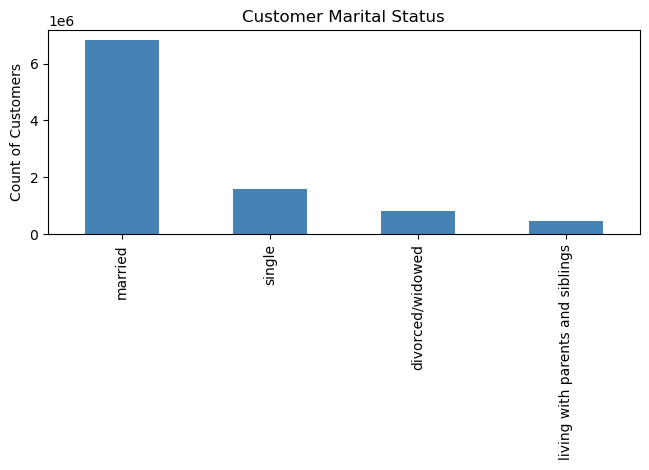

In [78]:
# Explore marital status distribution 

bar_marital_status = df_customer_demo_vis['marital_status'].value_counts().plot.bar(color = 'steelblue')

plt.title('Customer Marital Status')
plt.tight_layout()
plt.ylabel('Count of Customers')

Observations: The majority of customers are married, making up more than all of the other marital status' combined. This means that examining trends between customers who are married and their spending behavior could be useful.

In [79]:
# Export marital_status bar

bar_marital_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_marital_status.png'), bbox_inches='tight')

# Step 7 Explore connection between age and spending power (income)

Text(11.472222222222216, 0.5, 'Income')

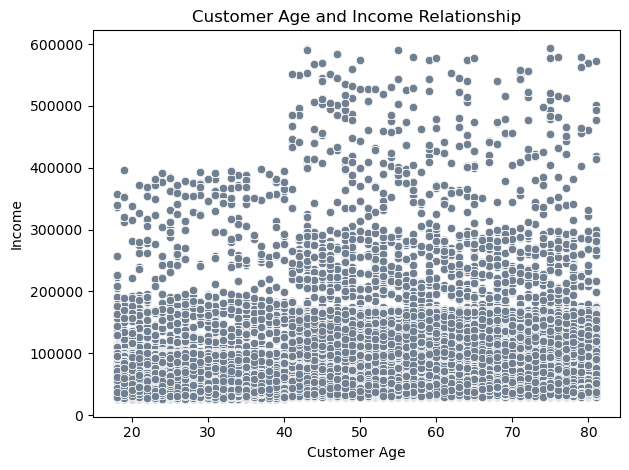

In [80]:
# Create scatterplot showing relationship between age and spending power

scat_age_income = sns.scatterplot(data = df_customer_demo_vis, x = 'age', y = 'income', color = 'slategrey')

plt.title('Customer Age and Income Relationship')
plt.tight_layout()
plt.xlabel('Customer Age')
plt.ylabel('Income')

Observations: There is no significant connection between age and income. However, most customers make under 200,000. There appears to be two groups of income variance, one between ages 20 and 40 and another between ages 40 and 80. This alligns with general concepts of career advancement and higher income across time. All of the high outliers for income are within customers above age 40. There is also a significant number of customers between age 40 and 80 who make between 200,000 and 300,000 that does not exist for people under age 40. Furthermore, there is more spread in income for people between ages 40 and 80.

In [81]:
# Export age and income scatterplot

scat_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_age_income.png'), bbox_inches='tight')

# Step 8 Export all visualizations and dfs

Completed along with each step

In [82]:
# Save random sample 

df_small_sample = small

In [83]:
# Export sample dataframes

df_small_sample.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_small_sample_orders_products_all.pkl'))